# 📊 Netflix Data Analysis

This project explores the Netflix dataset using Python libraries such as Pandas, Seaborn, and Matplotlib. We also create interactive visualizations using Tableau.

## 🧠 Objective
To understand content distribution, trends, and other insights from Netflix's catalog of Movies and TV Shows.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.shape

(8807, 12)

In [9]:
list(df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 🔍 Step 1: Loading and Exploring the Dataset

In [6]:
import pandas as pd
df=pd.read_csv('netflix_titles.csv')
df
df['director'] = df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df = df.dropna(subset=['date_added', 'duration'])

df.groupby(['country', 'type']).size().unstack().fillna(0).sort_values('Movie', ascending=False).head(10)



type,Movie,TV Show
country,,
United States,2055.0,754.0
India,893.0,79.0
Unknown,440.0,390.0
United Kingdom,206.0,212.0
Canada,122.0,59.0
Spain,97.0,48.0
Egypt,92.0,14.0
Nigeria,86.0,9.0
Indonesia,77.0,2.0


## 🧼 Step 2: Data Cleaning
We handle null values and prepare the dataset for analysis.

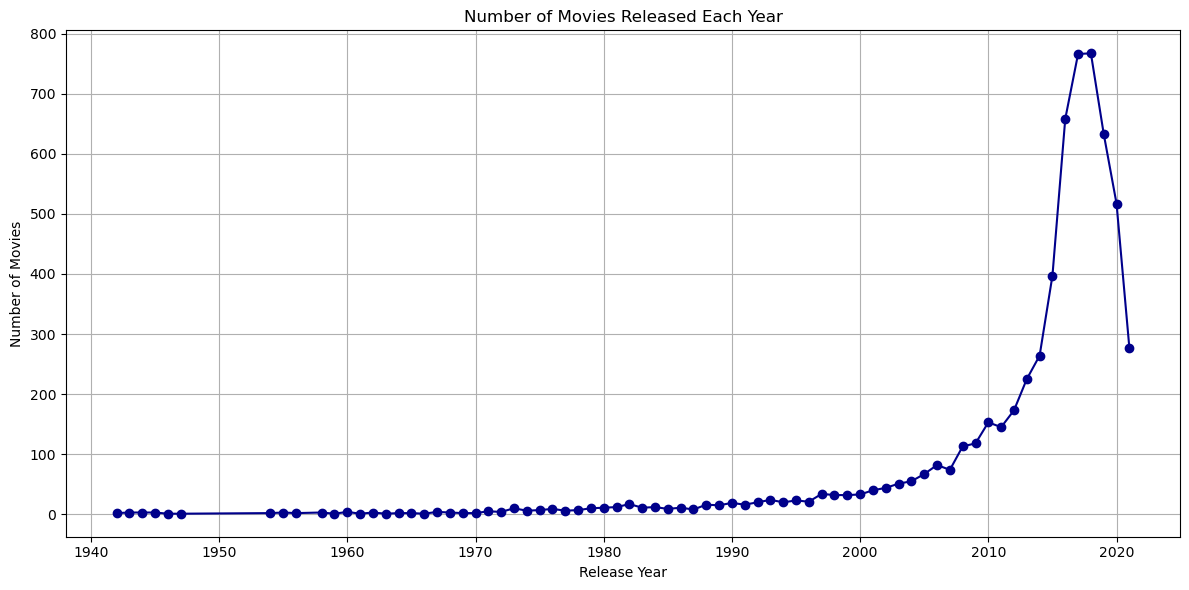

In [8]:
import matplotlib.pyplot as plt

movies = df[df['type'] == 'Movie']


release_counts = movies['release_year'].value_counts().sort_index()


plt.figure(figsize=(12,6))
plt.plot(release_counts.index, release_counts.values, marker='o', color='darkblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\kalpana.s\AppData\Local\Temp\ipykernel_44632\1354602794.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


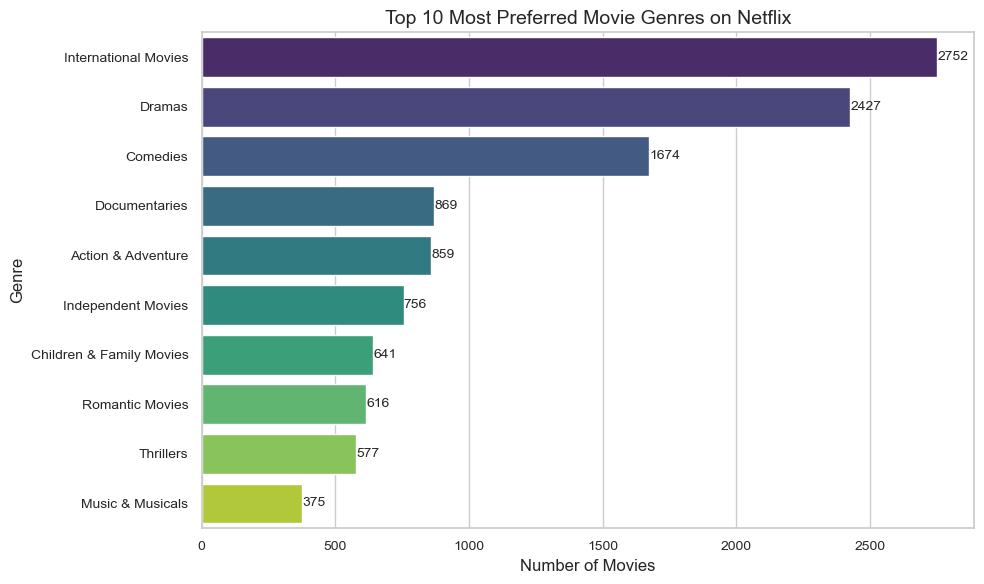

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = df[df['type'] == 'Movie'].copy()
movies['genres'] = movies['listed_in'].str.split(', ')
movies_exploded = movies.explode('genres')

top_genres = movies_exploded['genres'].value_counts().head(10)
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Preferred Movie Genres on Netflix', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(top_genres.values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\kalpana.s\AppData\Local\Temp\ipykernel_44632\1308733903.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index, palette='mako')


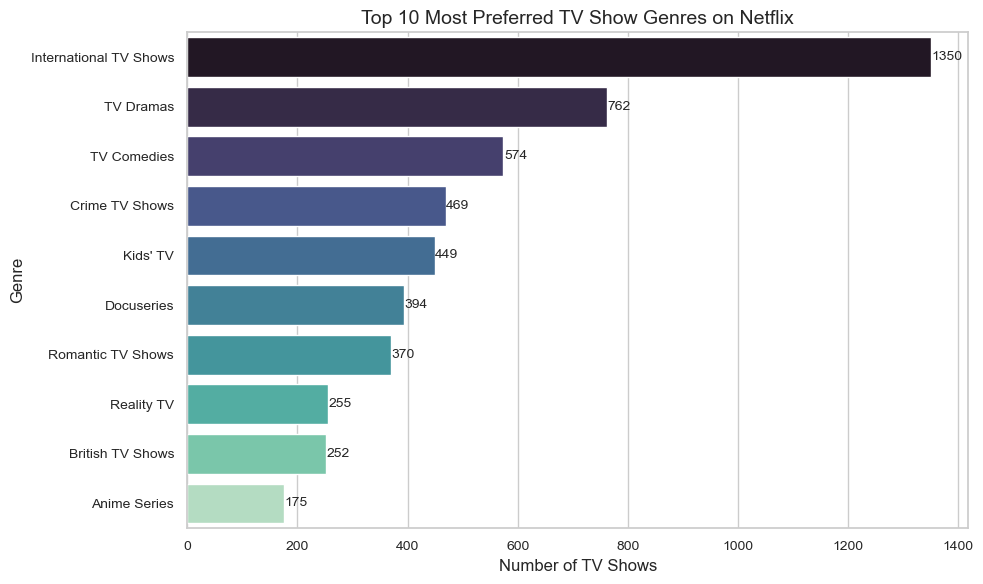

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['genres'] = tv_shows['listed_in'].str.split(', ')
tv_exploded = tv_shows.explode('genres')
top_tv_genres = tv_exploded['genres'].value_counts().head(10)
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index, palette='mako')
plt.title('Top 10 Most Preferred TV Show Genres on Netflix', fontsize=14)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(top_tv_genres.values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


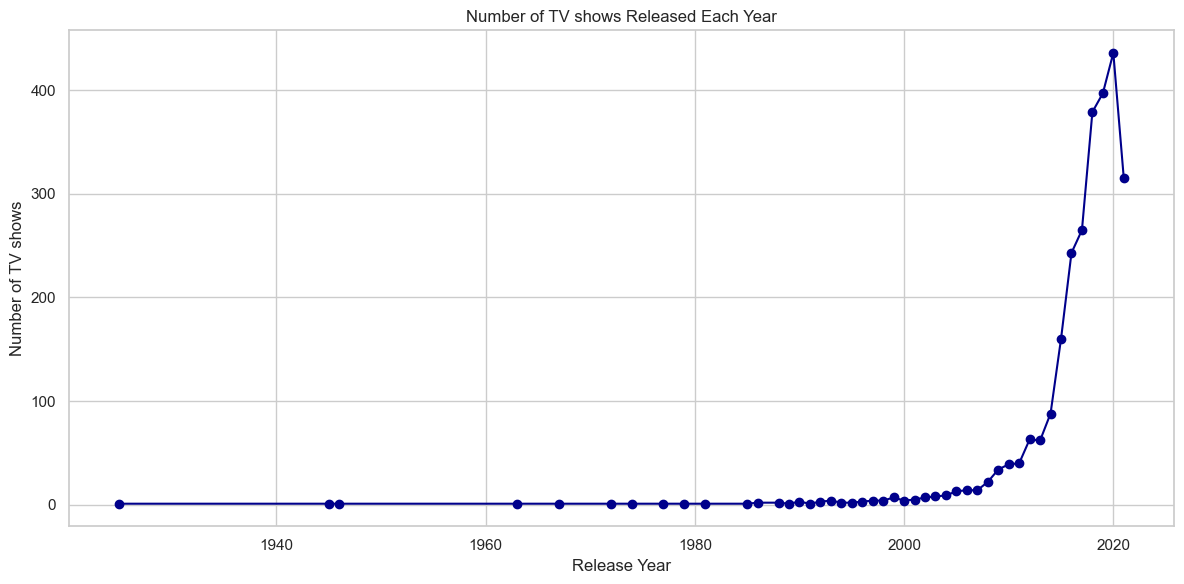

In [20]:
import matplotlib.pyplot as plt

tv_shows = df[df['type'] == 'TV Show']

release_counts = tv_shows['release_year'].value_counts().sort_index()


plt.figure(figsize=(12,6))
plt.plot(release_counts.index, release_counts.values, marker='o', color='darkblue')
plt.title('Number of TV shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of TV shows')
plt.grid(True)
plt.tight_layout()
plt.show()




## 📈 Step 3: Visual Analysis - Movies and TV Shows Distribution

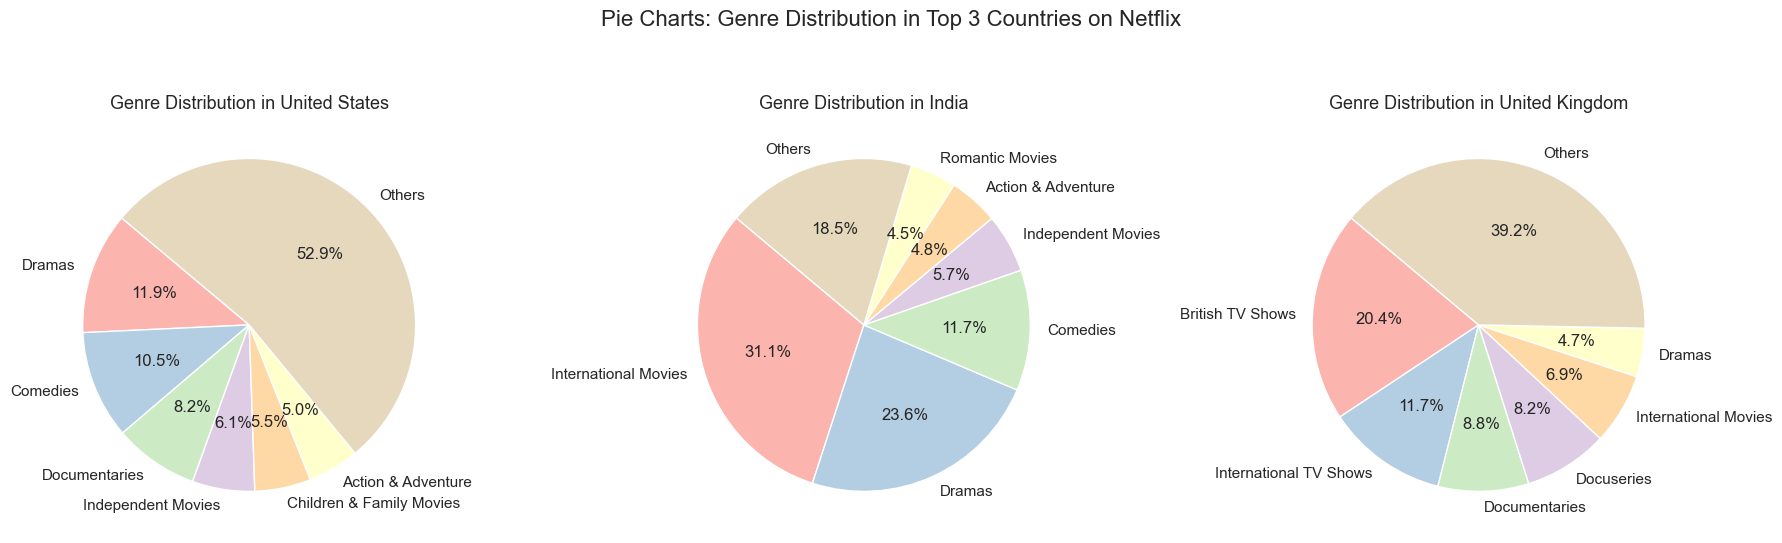

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

content = df.copy()


content['genres'] = content['listed_in'].str.split(', ')
content = content.explode('genres')
content = content[content['country'] != 'Unknown']


top_countries = content['country'].value_counts().head(3).index

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, country in enumerate(top_countries):
    country_data = content[content['country'] == country]
    
    
    genre_counts = country_data['genres'].value_counts().head(6)  
    other_count = country_data['genres'].value_counts()[6:].sum()
    
    
    genre_counts['Others'] = other_count
    
    
    axes[i].pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    axes[i].set_title(f'Genre Distribution in {country}', fontsize=13)

plt.suptitle('Pie Charts: Genre Distribution in Top 3 Countries on Netflix', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()




<Figure size 1200x600 with 0 Axes>

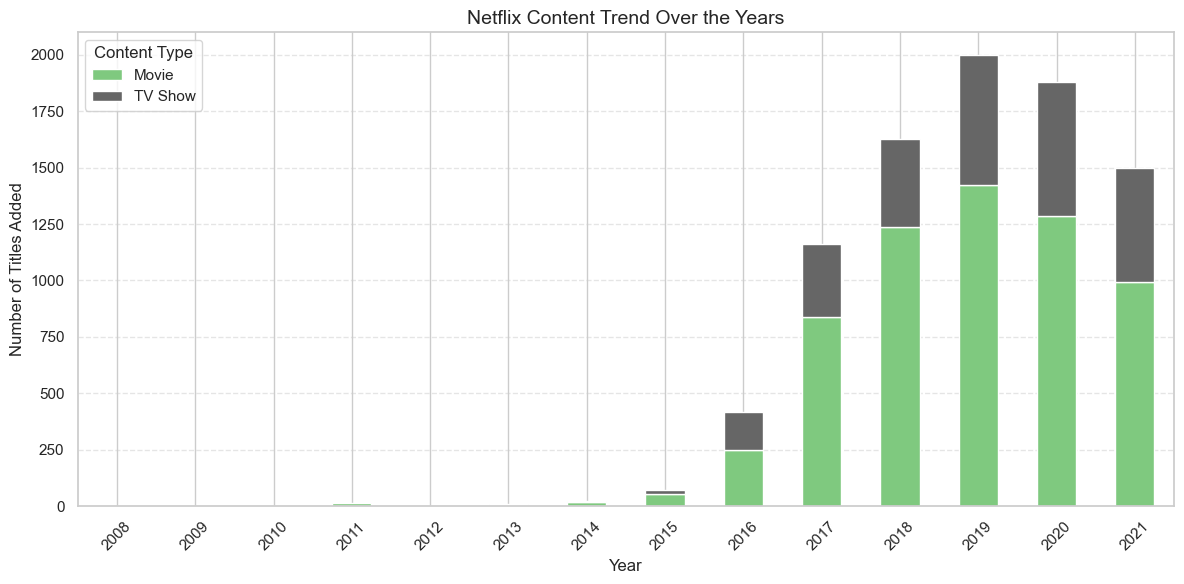

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid warnings
netflix_df = df.copy()

# Ensure 'date_added' is datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Drop rows where 'date_added' is still null
netflix_df = netflix_df.dropna(subset=['date_added'])

# Extract year
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Group by year and type
content_trend = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12,6))
content_trend.plot(kind='bar', stacked=True, colormap='Accent', figsize=(12,6))

plt.title('Netflix Content Trend Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🌍 Step 4: Country-wise Content Analysis

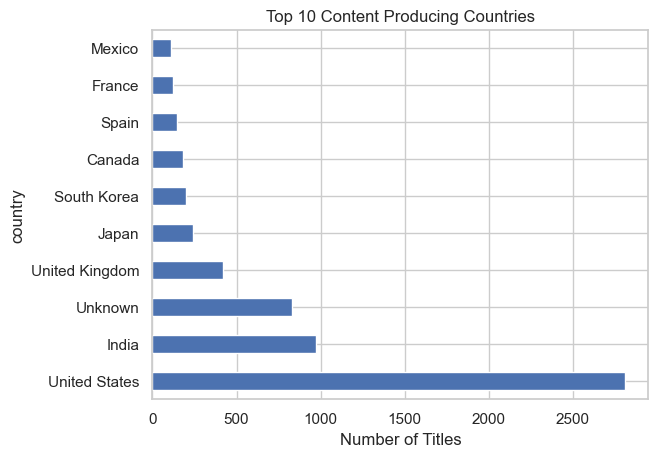

In [37]:
df['country'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Titles')
plt.title('Top 10 Content Producing Countries')
plt.show()

## ✅ Conclusion

- The majority of content on Netflix are movies.
- USA and India dominate the content production.
- Most releases happened after 2015.
- TV shows are shorter, while movies vary greatly in duration.

### 🔗 Tableau Dashboard
*(Add link to Tableau Public when published)*